# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
cities

['tiksi',
 'adamstown',
 'hamilton',
 'kerikeri',
 "st. john's",
 'chonchi',
 'kamakwie',
 'ilulissat',
 'port-aux-francais',
 'hermanus',
 'ancud',
 'gaoyou',
 'tual',
 'bredasdorp',
 'guerrero negro',
 'hacienda huancane',
 'olonkinbyen',
 'lihue',
 'whitehorse',
 'shahpur',
 'chibougamau',
 'zakamensk',
 'brisas de zicatela',
 'albany',
 'puerto aysen',
 'grytviken',
 'iqaluit',
 'kone',
 'edinburgh of the seven seas',
 'yuzhno-kurilsk',
 'al mayadin',
 'monte alegre',
 'kailua-kona',
 'bethel',
 'turkestan',
 'khorixas',
 'weno',
 'haiku-pauwela',
 'west island',
 'hawaiian paradise park',
 "nar'yan-mar",
 'luderitz',
 'burlington',
 'huayin',
 'thinadhoo',
 'yellowknife',
 'anadyr',
 'chagoda',
 'reggane',
 'usogorsk',
 'port alfred',
 'dossor',
 'afaahiti',
 'ribeira grande',
 'ilabaya',
 'fortaleza',
 'qaqortoq',
 'waitangi',
 'kingston',
 'tabuk',
 'pozzallo',
 'nantucket',
 'northam',
 "arkhangel'sk",
 'puerto ayora',
 'polygyros',
 'jamestown',
 'kavaratti',
 'badger',
 'coll

In [6]:
# Set the API base URL
# https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
url = "https://api.openweathermap.org/data/2.5/weather?" # YOUR CODE HERE
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"   # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']             # YOUR CODE HERE
        city_max_temp = city_weather['main']['temp_max']    # YOUR CODE HERE
        city_humidity = city_weather['main']['humidity']    # YOUR CODE HERE
        city_clouds = city_weather['clouds']['all']         # YOUR CODE HERE
        city_wind = city_weather['wind']['speed']            # YOUR CODE HERE
        city_country = city_weather['sys']['country']         # YOUR CODE HERE
        city_date = city_weather['dt']            # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | hamilton
Processing Record 4 of Set 1 | kerikeri
Processing Record 5 of Set 1 | st. john's
Processing Record 6 of Set 1 | chonchi
Processing Record 7 of Set 1 | kamakwie
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | ancud
Processing Record 12 of Set 1 | gaoyou
Processing Record 13 of Set 1 | tual
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | guerrero negro
Processing Record 16 of Set 1 | hacienda huancane
Processing Record 17 of Set 1 | olonkinbyen
Processing Record 18 of Set 1 | lihue
Processing Record 19 of Set 1 | whitehorse
Processing Record 20 of Set 1 | shahpur
Processing Record 21 of Set 1 | chibougamau
Processing Record 22 of Set 1 | zakamensk
Processing Record 23 of S

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-6.61,83,100,10.86,RU,1712636397
1,adamstown,-25.0660,-130.1015,23.80,72,94,3.88,PN,1712636398
2,hamilton,39.1834,-84.5333,18.35,83,40,3.60,US,1712635849
3,kerikeri,-35.2268,173.9474,22.17,81,94,3.30,NZ,1712636398
4,st. john's,47.5649,-52.7093,-0.68,94,100,11.62,CA,1712636192


In [9]:
# # Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-6.61,83,100,10.86,RU,1712636397
1,adamstown,-25.0660,-130.1015,23.80,72,94,3.88,PN,1712636398
2,hamilton,39.1834,-84.5333,18.35,83,40,3.60,US,1712635849
3,kerikeri,-35.2268,173.9474,22.17,81,94,3.30,NZ,1712636398
4,st. john's,47.5649,-52.7093,-0.68,94,100,11.62,CA,1712636192


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

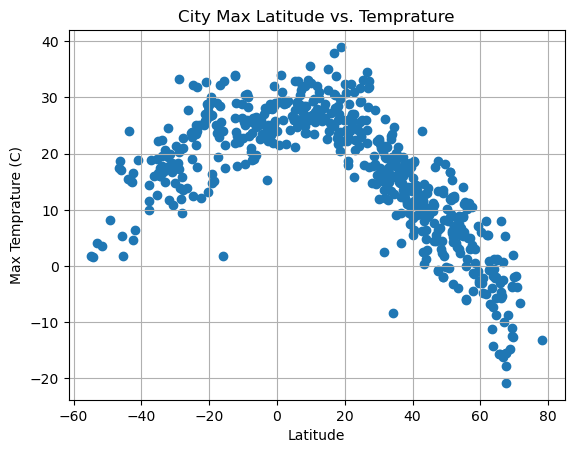

In [12]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (C)")
plt.title("City Max Latitude vs. Temprature")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

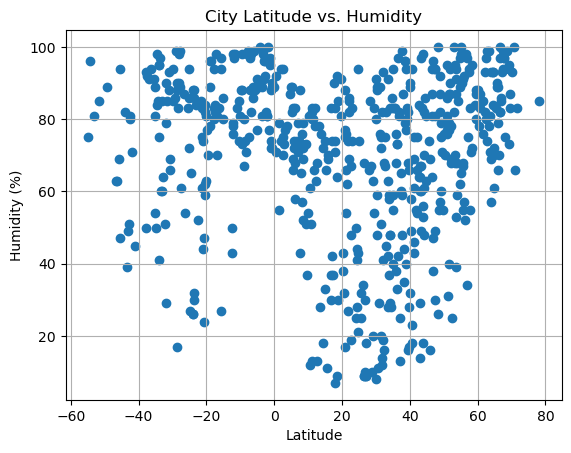

In [13]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid()
# plt.xlim(-60,80,20)
# plt.ylim(0,100,20)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

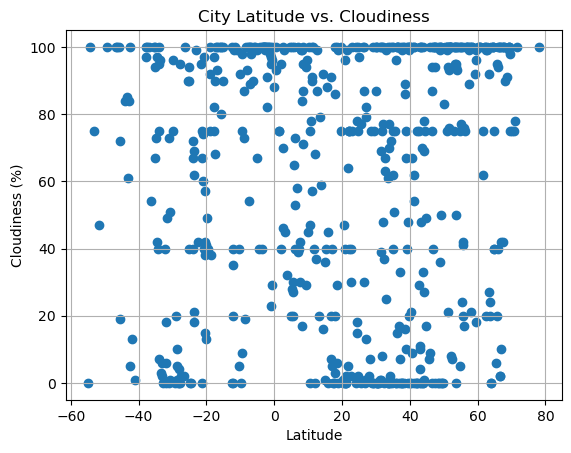

In [14]:
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid()
# plt.xlim(-60,80,20)
# plt.ylim(0,100,20)
plt.tight_layout
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

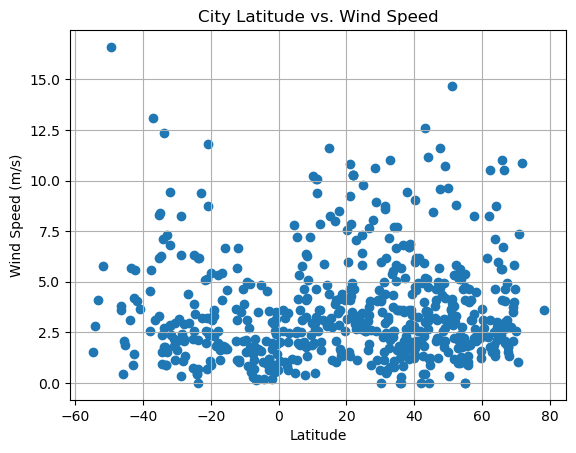

In [15]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_regress(x,y,eqn_coordinates):
    r = st.pearsonr(x,y)
    print(f" r-value :{r[0]}")
    (slope, intercept,rvalue,pvalue,stderr) = linregress(x,y)
    regress_values = x*slope+intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # line_eq = f"y ={slope}x +{intercept}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=15, color='red')
    plt.scatter(x,y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")



In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-6.61,83,100,10.86,RU,1712636397
2,hamilton,39.1834,-84.5333,18.35,83,40,3.60,US,1712635849
4,st. john's,47.5649,-52.7093,-0.68,94,100,11.62,CA,1712636192
6,kamakwie,9.5000,-12.2333,25.91,73,29,2.39,SL,1712636398
7,ilulissat,69.2167,-51.1000,-10.99,73,100,2.06,GL,1712636399


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,23.80,72,94,3.88,PN,1712636398
3,kerikeri,-35.2268,173.9474,22.17,81,94,3.30,NZ,1712636398
5,chonchi,-42.6128,-73.8092,4.56,81,5,1.44,CL,1712636398
8,port-aux-francais,-49.3500,70.2167,8.22,89,100,16.61,TF,1712636399
9,hermanus,-34.4187,19.2345,16.07,85,40,0.94,ZA,1712636399


###  Temperature vs. Latitude Linear Regression Plot

 r-value :-0.8927174161587155


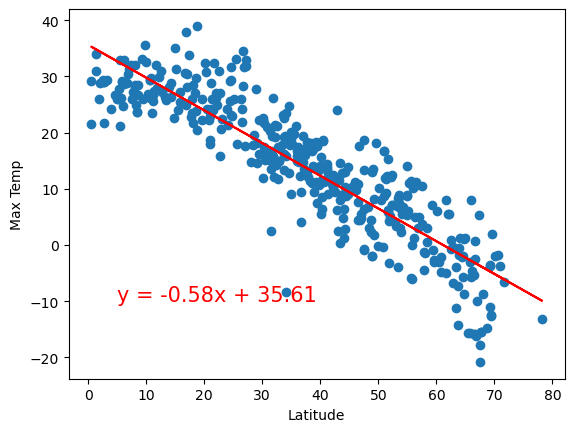

In [19]:
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (5, -10))


The r-value is: 0.7161472181434118


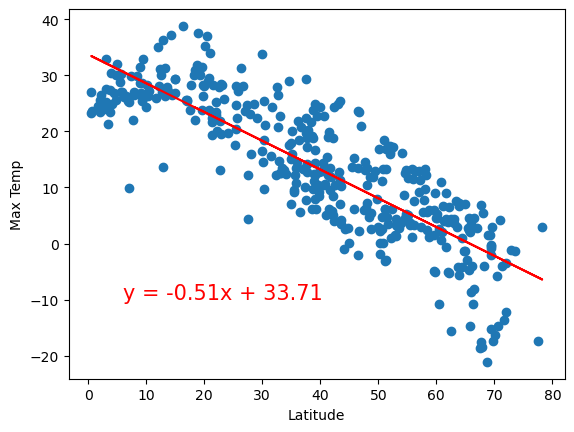

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
# linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))


 r-value :0.6394661626806128


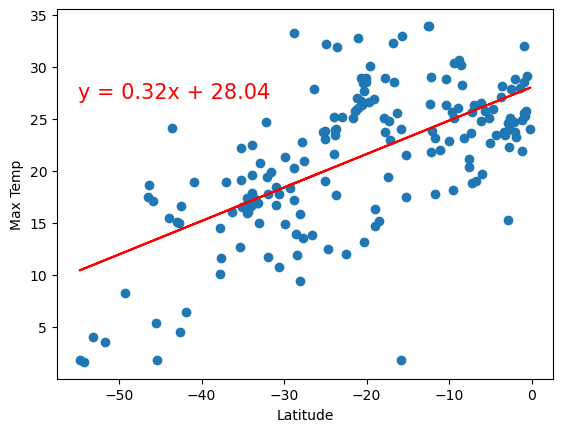

In [20]:
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-55,27))


The r-value is: 0.4121057168607245


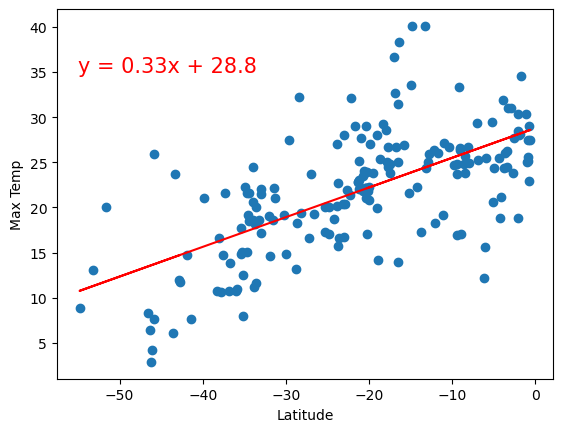

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

 r-value :0.27700539218696135


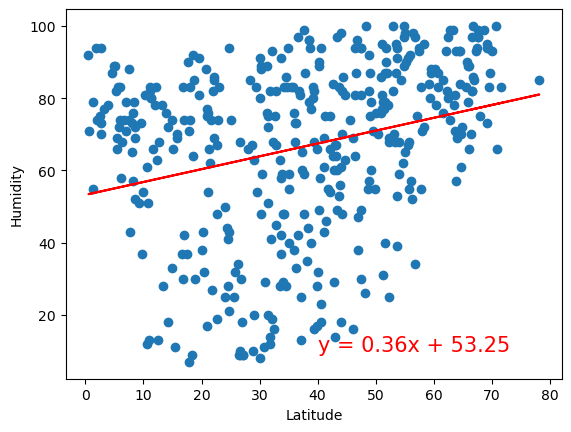

In [21]:
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (40, 10))

The r-value is: 0.05689741545789598


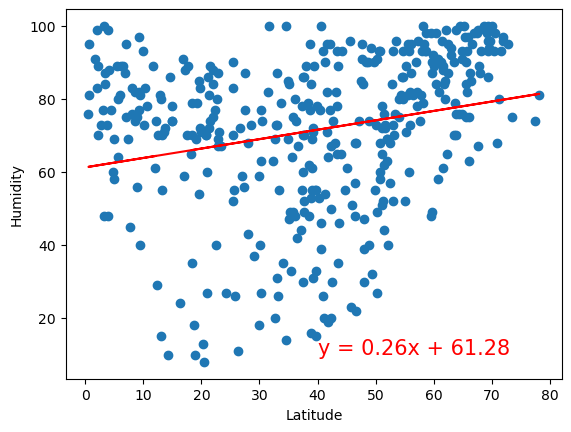

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

 r-value :0.26008494189383013


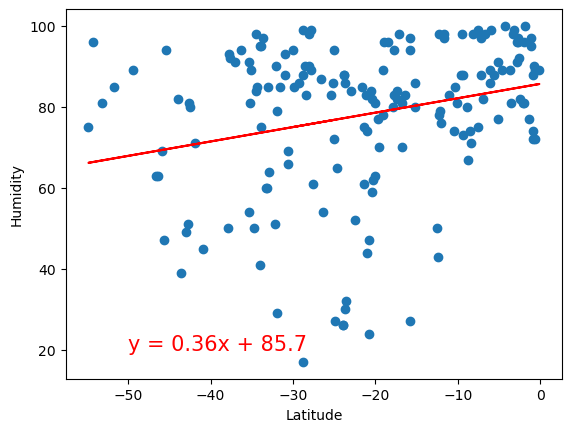

In [22]:
linear_regress(southern_hemi_df["Lat"].rename("Latitude"),southern_hemi_df["Humidity"], (-50, 20))

The r-value is: 0.0002808747046324607


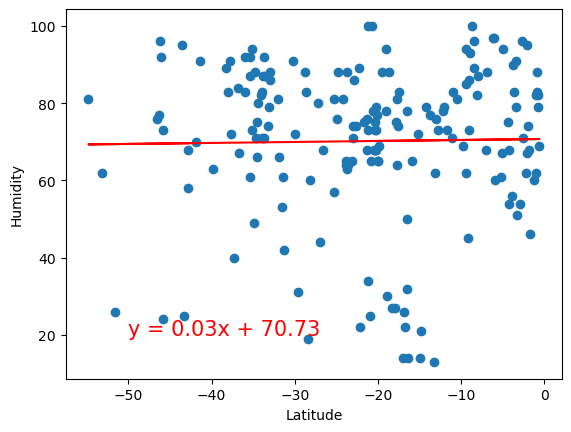

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

 r-value :0.17016168865318246


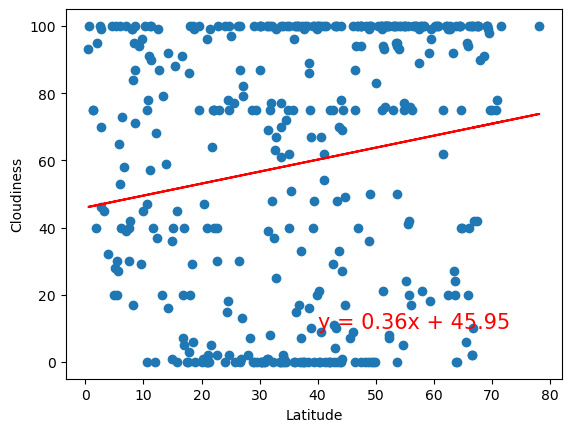

In [23]:
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (40, 10))


The r-value is: 0.024026517125811015


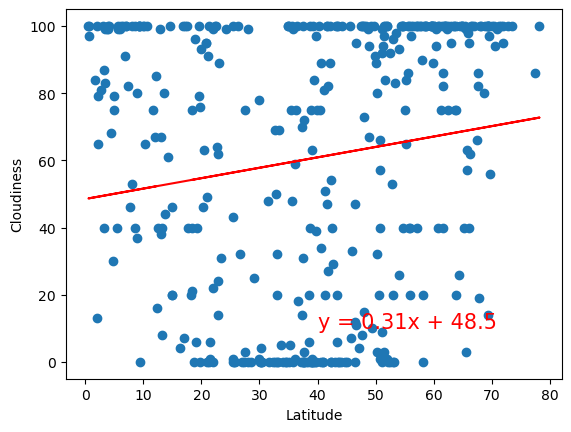

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

 r-value :0.2627651379619385


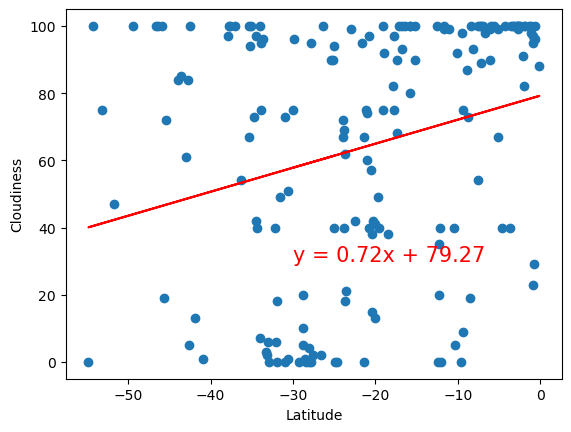

In [24]:
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-30, 30))


The r-value is: 0.02056735429994368


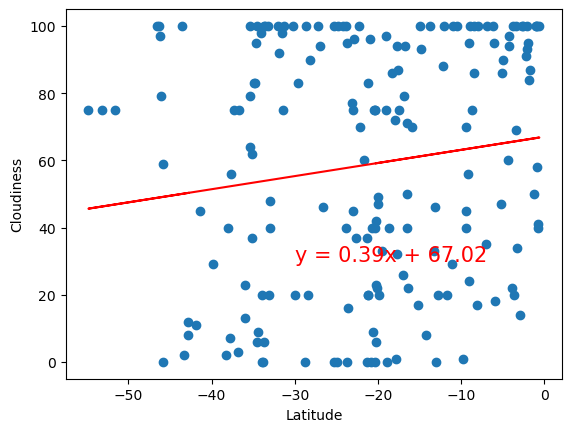

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

 r-value :-0.01744443494810734


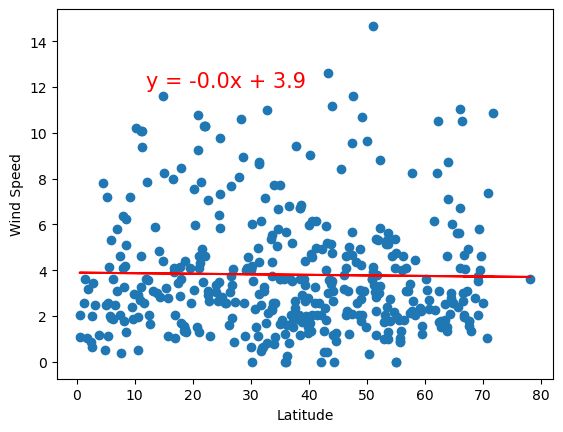

In [25]:
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (12, 12))


The r-value is: 0.030396762354449467


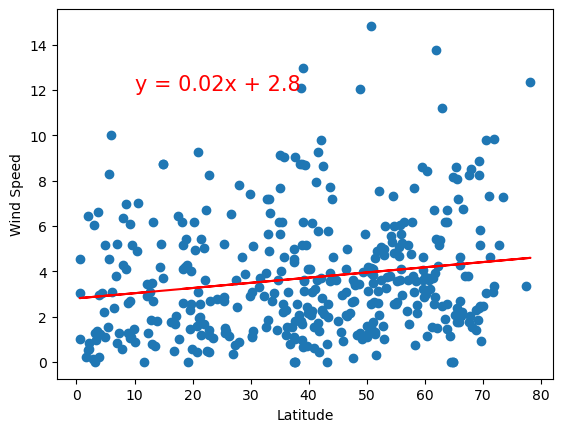

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

 r-value :-0.3172553077275907


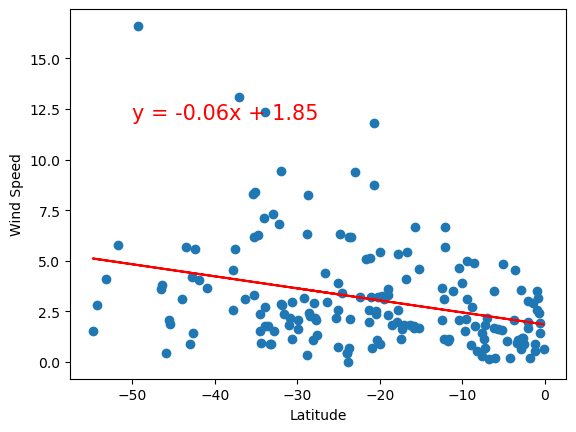

In [26]:
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 12))


The r-value is: 0.062239040700515696


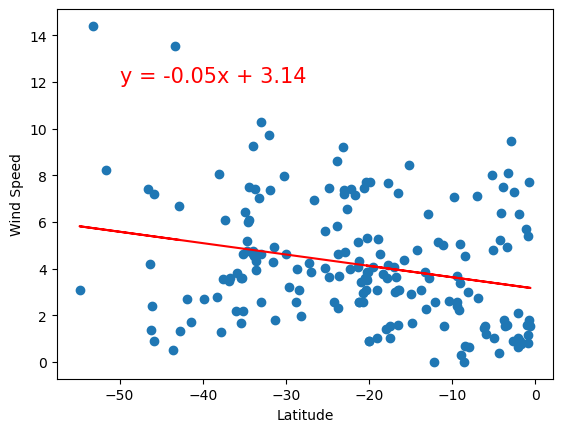

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE